In [1]:
import numpy as np, curvedsky, local, healpy as hp, pickle, warnings
from matplotlib.pyplot import *
from pixell import enmap
warnings.filterwarnings("ignore")

In [2]:
from tools_cmb import *

In [3]:
aobj = local.init_analysis_params(qid='boss_s15n',fltr='cinv',snmin=1,snmax=30)
Aobj = local.init_analysis_params(qid='boss_s15n',snmin=1,snmax=aobj.snmax,wind='base',ivar='noivar')
#Aobj = local.init_analysis_params(qid='comb_d',snmin=1,snmax=1,wind='com15',ivar='noivar')

In [4]:
#aobj = local.init_analysis_params(qid='boss_d03',fltr='cinv',snmin=1,snmax=3)
#Aobj = local.init_analysis_params(qid='boss_d03',snmin=1,snmax=3,wind='com15',ivar='noivar')

In [5]:
mask = load_window_curvedsky( aobj, with_ivar=False, add_mask=False )
W2 = np.average(mask**2)

In [6]:
T  = np.zeros((1,1,aobj.npix))
print(aobj.nside,aobj.npix,aobj.lmax)

2048 50331648 4096


In [7]:
Tmap = curvedsky.utils.hp_alm2map(aobj.nside,aobj.lmax,aobj.lmax,pickle.load(open(Aobj.falm['c']['T'][0],"rb")))
#Ts = enmap.read_map(Aobj.fmap['s'][0])[0]
#Tn = enmap.read_map(aobj.fmap['n'][1])[0]
#Tn = 0.
#T[0,0,:] = mask*enmap.to_healpix( remove_lxly( Ts+Tn, lmin=aobj.clmin, lmax=aobj.lmax ), nside=aobj.nside )

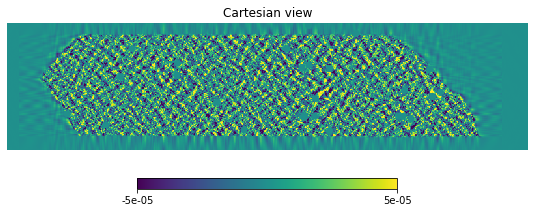

In [8]:
hp.cartview(Tmap,lonra=[140,250],latra=[-5,22],min=-5e-5,max=5e-5)

Load cinv map

In [9]:
tmap = curvedsky.utils.hp_alm2map(aobj.nside,aobj.lmax,aobj.lmax,pickle.load(open(aobj.falm['c']['T'][0],"rb")))

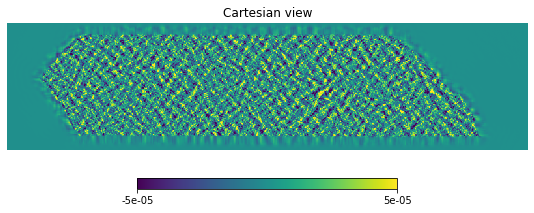

In [10]:
hp.cartview(tmap,lonra=[140,250],latra=[-5,22],min=-5e-5,max=5e-5)

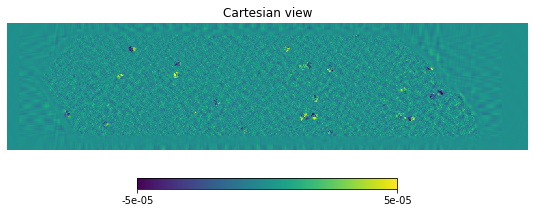

In [11]:
hp.cartview(tmap-Tmap,lonra=[140,250],latra=[-5,22],min=-5e-5,max=5e-5)

In [12]:
cl = np.zeros(aobj.lmax+1)
Cl = np.zeros(aobj.lmax+1)
xl = np.zeros(aobj.lmax+1)
Xl = np.zeros(aobj.lmax+1)
il = np.zeros(aobj.lmax+1)
for rlz in aobj.rlz:
    print(rlz)
    tlm = pickle.load(open(aobj.falm['c']['T'][rlz],"rb"))
    cl += curvedsky.utils.alm2cl(aobj.lmax,tlm)
    #Ts = enmap.read_map(aobj.fmap['s'][rlz])[0]
    #Tn = enmap.read_map(aobj.fmap['n'][rlz])[0]
    #Tmap = mask*enmap.to_healpix( remove_lxly( Ts+Tn, lmin=aobj.clmin, lmax=aobj.lmax ), nside=aobj.nside )
    #Tlm = curvedsky.utils.hp_map2alm(aobj.nside,aobj.lmax,aobj.lmax,Tmap)
    Tlm = pickle.load(open(Aobj.falm['c']['T'][rlz],"rb"))
    Cl += curvedsky.utils.alm2cl(aobj.lmax,Tlm)
    f = '/project/projectdirs/act/data/actsims_data/signal_v0.4/fullskyLensedUnabberatedCMB_alm_set00_'+str(rlz).zfill(5)+'.fits'
    Tlm_inp = np.complex128( hp.fitsfunc.read_alm( f, hdu = (1) ) ) / local.Tcmb
    ilmax = hp.sphtfunc.Alm.getlmax(len(Tlm_inp))
    Tlm_inp = curvedsky.utils.lm_healpy2healpix(Tlm_inp, ilmax)[:aobj.lmax+1,:aobj.lmax+1]
    il += curvedsky.utils.alm2cl(aobj.lmax,Tlm_inp)
    xl += curvedsky.utils.alm2cl(aobj.lmax,tlm,Tlm_inp)
    Xl += curvedsky.utils.alm2cl(aobj.lmax,Tlm,Tlm_inp)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


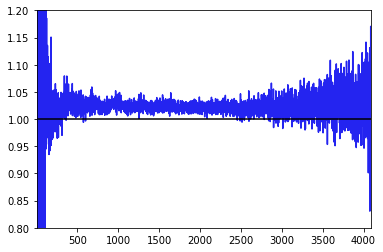

In [13]:
xlim(1,4096)
ylim(0.8,1.2)
plot(xl**2/cl*Cl/Xl**2)
axhline(1,color='k')
#plot(Xl**2/il/Cl)